In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('pd_speech_features.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [3]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
null_values=df.isnull().sum()

In [5]:
null_values

,0
id,0
gender,0
PPE,0
DFA,0
RPDE,0
...,...
tqwt_kurtosisValue_dec_33,0
tqwt_kurtosisValue_dec_34,0
tqwt_kurtosisValue_dec_35,0
tqwt_kurtosisValue_dec_36,0


In [6]:
y = df.loc[:,'class']
X = df.drop(['class', 'id'], axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.4394,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,137.3126,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,5.4425,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131


In [9]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
751,0
752,0
753,0
754,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.svm import SVC
classifier_1 = SVC(kernel='linear')
classifier_2 = SVC(kernel='rbf')
classifier_3 = SVC(kernel='poly')

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

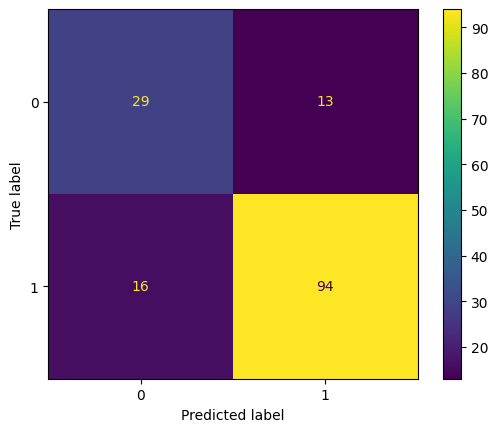

In [15]:
classifier_1.fit(X_train, y_train)
y_pred_1 = classifier_1.predict(X_test)
confusion_matrix_1 = confusion_matrix(y_test, y_pred_1)
cm_display_1 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_1, display_labels = [0, 1])
cm_display_1.plot()
plt.show()

In [16]:
accuracy_1 = accuracy_score(y_test,y_pred_1)
print(f"Acuracy dla liniowego kernela{accuracy_1}")

Acuracy dla liniowego kernela0.8092105263157895


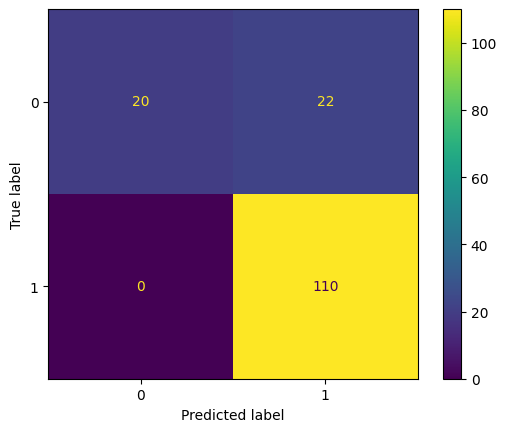

In [17]:
classifier_2.fit(X_train, y_train)
y_pred_2 = classifier_2.predict(X_test)
confusion_matrix_2 = confusion_matrix(y_test, y_pred_2)
cm_display_2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = [0, 1])
cm_display_2.plot()
plt.show()

In [18]:
accuracy_2 = accuracy_score(y_test,y_pred_2)
print(f"Acuracy kernela rbf {accuracy_2}")

Acuracy kernela rbf 0.8552631578947368


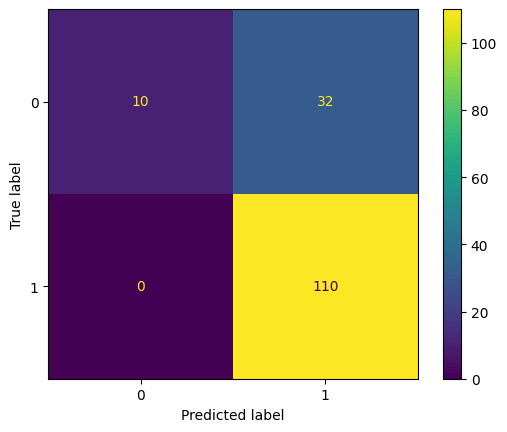

In [19]:
classifier_3.fit(X_train, y_train)
y_pred_3 = classifier_3.predict(X_test)
confusion_matrix_3 = confusion_matrix(y_test, y_pred_3)
cm_display_3 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_3, display_labels = [0, 1])
cm_display_3.plot()
plt.show()

In [20]:
accuracy_3 = accuracy_score(y_test,y_pred_3)
print(f"Acuracy kernela wielowymianowego {accuracy_3}")

Acuracy kernela wielowymianowego 0.7894736842105263
